In [1]:
#!conda install -y -c ipyrad structure clumpp

In [2]:
import matplotlib.pyplot as plt
import ipyrad.analysis as ipa   ## ipyrad analysis toolkit
import ipyparallel as ipp       ## parallel processing
import toyplot                  ## plotting library   

In [3]:
## get parallel client
ipyclient = ipp.Client()
print("Connected to {} cores".format(len(ipyclient)))

Connected to 16 cores


In [4]:
## the structure formatted file
strfile = "../Thom_vcf/structure/1_pachy_Final_75per_STRUCTURE_random.str"

## an optional mapfile, to sample unlinked SNPs
#mapfile = "./anolis_outfiles/anolis.snps.map"

## the directory where outfiles should be written
workdir = "../Thom_vcf/structure/"

In [5]:
## create a Structure object
struct = ipa.structure(name="aglaiae-test",
                       data=strfile, 
                       #mapfile=mapfile,
                       workdir=workdir)

In [6]:
## set mainparams for object
struct.mainparams.burnin = 100000
struct.mainparams.numreps = 500000

#struct.mainparams.burnin = 1000
#struct.mainparams.numreps = 5000


## see all mainparams
print struct.mainparams

## see or set extraparams
print struct.extraparams

burnin             100000              
extracols          0                   
label              1                   
locdata            0                   
mapdistances       0                   
markernames        0                   
markovphase        0                   
missing            -9                  
notambiguous       -999                
numreps            500000              
onerowperind       0                   
phased             0                   
phaseinfo          0                   
phenotype          0                   
ploidy             2                   
popdata            0                   
popflag            0                   
recessivealleles   0                   

admburnin           500                 
alpha               1.0                 
alphamax            10.0                
alphapriora         1.0                 
alphapriorb         2.0                 
alphapropsd         0.025               
ancestdist          0            

In [7]:
## a range of K-values to test
kvalues = [2, 3, 4, 5]

## submit batches of 20 replicate jobs for each value of K 
for kpop in kvalues:
    struct.run(
        kpop=kpop, 
        nreps=20, 
        seed=42343,
        ipyclient=ipyclient,
        )

submitted 20 structure jobs [aglaiae-test-K-2]
submitted 20 structure jobs [aglaiae-test-K-3]
submitted 20 structure jobs [aglaiae-test-K-4]
submitted 20 structure jobs [aglaiae-test-K-5]


In [13]:
## check if a specific job is done
for async in struct.asyncs:
    print(async.ready()),

True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True


In [6]:
## block/wait until all jobs finished
ipyclient.wait() 

True

In [8]:
## set some clumpp params and print params to the screen
struct.clumppparams.repeats = 100000

struct.clumppparams

datatype                  0                   
every_permfile            0                   
greedy_option             2                   
indfile                   0                   
m                         3                   
miscfile                  0                   
order_by_run              1                   
outfile                   0                   
override_warnings         0                   
permfile                  0                   
permutationsfile          0                   
permuted_datafile         0                   
popfile                   0                   
print_every_perm          0                   
print_permuted_data       0                   
print_random_inputorder   0                   
random_inputorderfile     0                   
repeats                   100000              
s                         2                   
w                         1                   

In [13]:
## run clumpp for each value of K
kvalues = [2, 3, 4, 5]
tables = struct.get_clumpp_table(kvalues)

[K2] 57/57 results permuted across replicates (max_var=0).
[K3] 57/57 results permuted across replicates (max_var=0).
[K4] 57/57 results permuted across replicates (max_var=0).
[K5] 48/48 results permuted across replicates (max_var=0).


In [14]:
## return the evanno table w/ deltaK
struct.get_evanno_table(kvalues)

,Nreps,deltaK,estLnProbMean,estLnProbStdev,lnPK,lnPPK
2,57,0.000,-10564.563,2.976,0.000,0.000
3,57,532.744,-9455.277,3.124,1109.286,1664.042
4,57,0.446,-10010.033,1864.131,-554.756,831.544
5,48,0.000,-11396.333,4393.153,-1386.300,0.000


In [25]:
## custom sorting order
myorder = [
    'P_insularis_45500.variant19', 
    'P_a_alb393859.variant', 
    'P_albiventris_82440.variant10',
    'P_aglaiae_aglaiae_FMNH394012.variant9',
    'Pac_sum104042.variant7',
    'P_hypophaeus_94114.variant18',
    'P_gravis_208892.variant13',
    'P_gravis_706505.variant14',
    'P_hypophaeus_94113.variant17',
    'P_latirostris_646779.variant21',
    'Pac_lat646936.variant6',
    'P_latirostris_119052.variant20', 
    'Pac_agl393860.variant2', 
    'Pac_yuc99965.variant8', 
    'Pach_aglaiae_DOT3688.variant3', 
    'Pachy_agla_L60882.variant4', 
    'Pachy_homo_L2306.variant5',
    'P_canescens_71019.variant11',
    'P_cinnamomeus_cinnamomeus_LSU12174.variant12',
    'P_homochrous_18489.variant15',
    'P_homochrous_7845.variant16'
]

In [26]:
for kpop in kvalues:
    ## parse outfile to a table and re-order it
    table = tables[kpop]
    table = table.ix[myorder]
    
    ## plot barplot w/ hover
    canvas, axes, mark = toyplot.bars(
                            table,
                            width=400,
                            height=200,
                            style={"stroke": toyplot.color.near_black},
                            )

#plt.savefig("Agl-Hom_struct_75.png")

/array1/lmusher/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


0 10 20 0.0 0.5 1.0

0 10 20 0.0 0.5 1.0

0 10 20 0.0 0.5 1.0

0 10 20 0.0 0.5 1.0

In [27]:
def fancy_plot(table):
    import toyplot
    ## further styling of plot with css 
    style = {"stroke":toyplot.color.near_black, 
         "stroke-width": 2}

    ## build barplot
    canvas = toyplot.Canvas(width=800, height=400)
    axes = canvas.cartesian(bounds=("5%", "95%", "5%", "45%"))
    axes.bars(table, style=style)

    ## add names to x-axis
    ticklabels = [i for i in table.index.tolist()]
    axes.x.ticks.locator = toyplot.locator.Explicit(labels=ticklabels)
    axes.x.ticks.labels.angle = -60
    axes.x.ticks.show = True
    axes.x.ticks.labels.offset = 10
    axes.x.ticks.labels.style = {"font-size": "12px"}
    axes.x.spine.style = style
    axes.y.show = False
    
    import toyplot.svg
    import toyplot.pdf
    toyplot.svg.render(canvas, "aglalaie-struct.svg")
    toyplot.pdf.render(canvas, "aglaiae-struct.pdf")

    ## show in notebook
    return canvas

[K2] 57/57 results permuted across replicates (max_var=0).


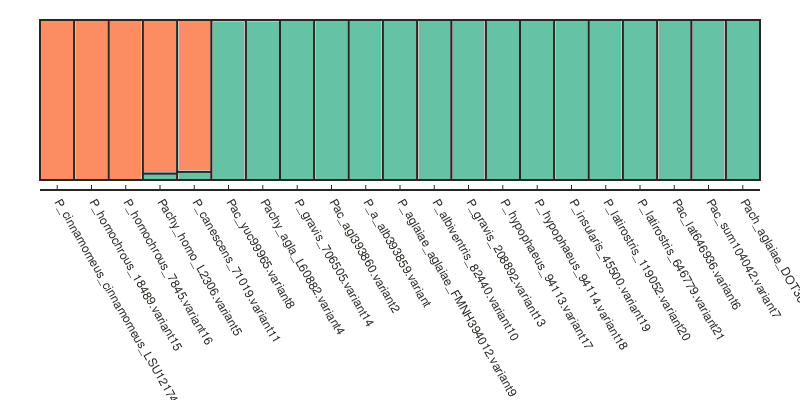

In [28]:
table = struct.get_clumpp_table(kvalues=2)
table = table.sort_values(by=[0, 1])
fancy_plot(table)


In [29]:
print struct.labels

['P_a_alb393859.variant', 'P_aglaiae_aglaiae_FMNH394012.variant9', 'P_albiventris_82440.variant10', 'P_canescens_71019.variant11', 'P_cinnamomeus_cinnamomeus_LSU12174.variant12', 'P_gravis_208892.variant13', 'P_gravis_706505.variant14', 'P_homochrous_18489.variant15', 'P_homochrous_7845.variant16', 'P_hypophaeus_94113.variant17', 'P_hypophaeus_94114.variant18', 'P_insularis_45500.variant19', 'P_latirostris_119052.variant20', 'P_latirostris_646779.variant21', 'Pac_agl393860.variant2', 'Pac_lat646936.variant6', 'Pac_sum104042.variant7', 'Pac_yuc99965.variant8', 'Pach_aglaiae_DOT3688.variant3', 'Pachy_agla_L60882.variant4', 'Pachy_homo_L2306.variant5']


In [35]:
## custom sorting order
myorder = [
    'P_insularis_45500.variant19', 
    'P_a_alb393859.variant', 
    'P_albiventris_82440.variant10',
    'P_aglaiae_aglaiae_FMNH394012.variant9',
    'Pac_sum104042.variant7',
    'P_hypophaeus_94114.variant18',
    'P_gravis_208892.variant13',
    'P_gravis_706505.variant14',
    'P_hypophaeus_94113.variant17',
    'P_latirostris_646779.variant21',
    'Pac_lat646936.variant6',
    'P_latirostris_119052.variant20', 
    'Pac_agl393860.variant2', 
    'Pac_yuc99965.variant8', 
    'Pach_aglaiae_DOT3688.variant3', 
    'Pachy_agla_L60882.variant4', 
    'Pachy_homo_L2306.variant5',
    'P_canescens_71019.variant11',
    'P_cinnamomeus_cinnamomeus_LSU12174.variant12',
    'P_homochrous_18489.variant15',
    'P_homochrous_7845.variant16'
]

[K3] 57/57 results permuted across replicates (max_var=0).


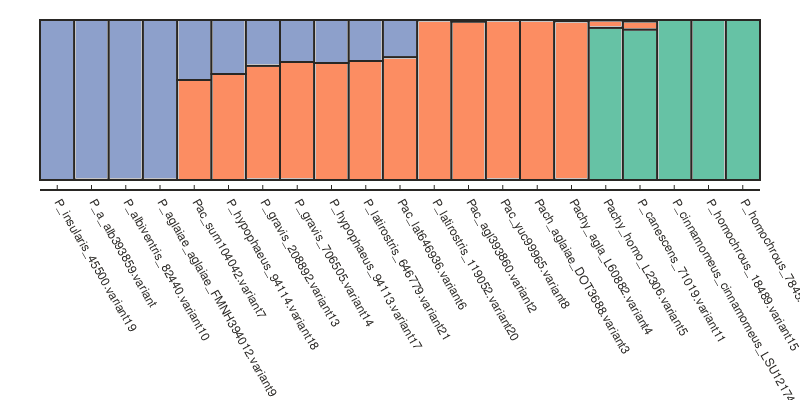

In [37]:
table = struct.get_clumpp_table(kvalues=3)
table = table.loc[myorder]
#table = table.sort_values(by=[0, 1])
fancy_plot(table)


[K4] 57/57 results permuted across replicates (max_var=0).


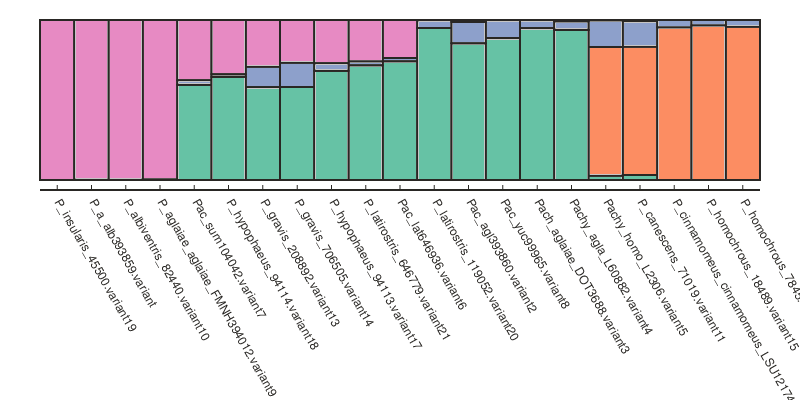

In [38]:
table = struct.get_clumpp_table(kvalues=4)
table = table.loc[myorder]
#table = table.sort_values(by=[0, 1])
fancy_plot(table)


[K5] 48/48 results permuted across replicates (max_var=0).


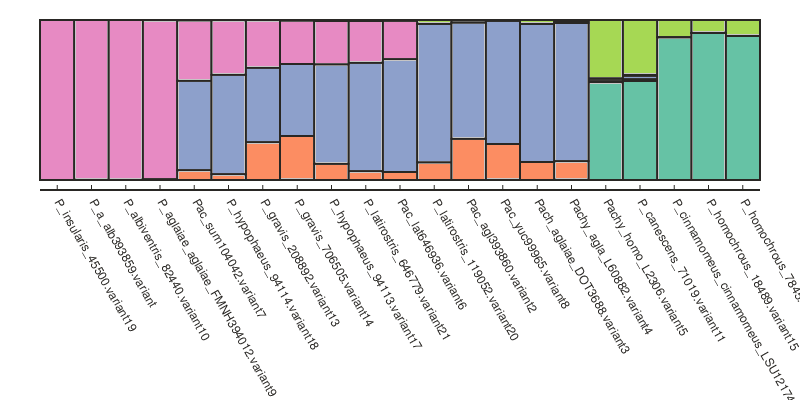

In [39]:
table = struct.get_clumpp_table(kvalues=5)
table = table.loc[myorder]
#table = table.sort_values(by=[0, 1])
fancy_plot(table)


In [40]:
struct.get_evanno_table([2, 3, 4, 5], max_var_multiple=10.)

[K4] 5 reps excluded (not converged) see 'max_var_multiple'.
[K5] 10 reps excluded (not converged) see 'max_var_multiple'.


,Nreps,deltaK,estLnProbMean,estLnProbStdev,lnPK,lnPPK
2,57,0.000,-10564.563,2.976,0.000,0.000
3,57,364.316,-9455.277,3.124,1109.286,1137.951
4,52,0.367,-9483.942,687.564,-28.665,252.335
5,38,0.000,-9764.942,1226.018,-281.000,0.000
